# 3 inputs, 2 outputs
# Class + Linear network definition

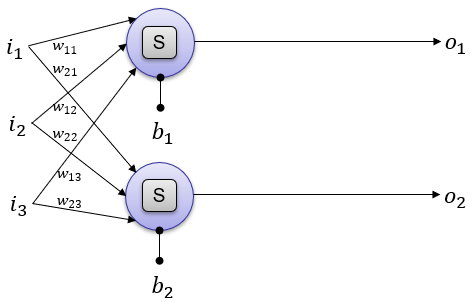

In [1]:
from IPython.display import Image
Image(filename = "nn_img/Python_Pytorch_nn_Sequential_i3_o2_sigmoid_01a.png", width=500)

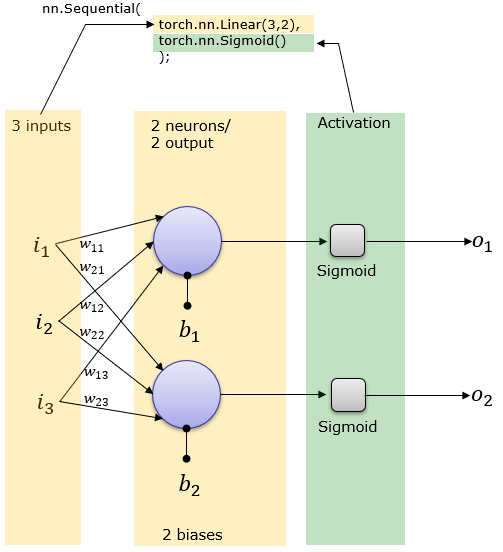

In [2]:
from IPython.display import Image
Image(filename = "nn_img/Python_Pytorch_nn_Sequential_i3_o2_sigmoid_01.png", width=500)

# Prerequisites

In [3]:
import torch
from torch import nn
from torch import optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#predictive
torch.manual_seed(1);

device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')  
    
#sigmoid explicit
def sigmoid(x):
    return 1/(1+torch.exp(-x))

#sigmoid pre-defined
activation = torch.nn.Sigmoid()

# Loss (Binary Cross Entropy) error function, explicit def
def bce_err(output, target):
    return -target * torch.log(output) - (1-target) * torch.log(1-output)

#sigmoid + BCELoss (Binary Cross Entropy)
criterion = torch.nn.BCEWithLogitsLoss()

def state(interval,i,loss,out,y):
    if(i%interval == 0):
        print("\n========== Epoch", i,"==========")
        print("loss=",loss)
    
        #to numpy
        out1 = out.data.numpy()
        y3 = y.numpy()
        #all values less than 0.5 to < 0
        out2 = out1-0.5
        # <0.5 turned to False, >= 0.5 turned to True
        out3 = (out2>=0)
        #boolean to decimal 0/1
        out4=out3*1   
        #boolean results
        rez = (out4 == y3)        
        #procent of True's(exact classification: y_hat=y, prediction = label/target)
        accuracy = np.min(np.mean(rez,axis=0))
        print("accuracy=",accuracy)        

#training points
data = np.array([
    [0.1,0.2,0.2,0,0],
    [0.1,0.2,0.5,0,1],
    [0.4,0.7,-0.3,1,0],
    [-0.1,0.3,0.8,1,1],
    [-0.1,0.8,0.8,1,0],
    [0.75,0.4,0.4,0,1],
])         

### Class + Linear network definition

In [4]:
#        nn.Linear(input,neurons)    
linear = nn.Linear(3, 2)
linear.weight

Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119],
        [ 0.2710, -0.5435,  0.3462]], requires_grad=True)

In [5]:
torch.manual_seed(1);

#features
x = torch.from_numpy(data[:, 0:3]).float()
#target/labels
y = torch.from_numpy(data[:, [3,4]]).float()

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,2)
        self.activation = nn.Sigmoid()
        
    def forward(self,x):
        o = self.linear(x)
        o = self.activation(o)
        return o

net = Network()
print(net)   
print(net.linear.weight.data)
print(net.linear.bias.data)
print(net.forward(x))  

Network(
  (linear): Linear(in_features=3, out_features=2, bias=True)
  (activation): Sigmoid()
)
tensor([[ 0.2975, -0.2548, -0.1119],
        [ 0.2710, -0.5435,  0.3462]])
tensor([-0.1188,  0.2937])
tensor([[0.4595, 0.5699],
        [0.4512, 0.5951],
        [0.4639, 0.4795],
        [0.4220, 0.5940],
        [0.3913, 0.5272],
        [0.4894, 0.6030]], grad_fn=<SigmoidBackward>)


In [6]:
#learn rate
alpha = 0.1
#iterations
epochs = 2000
#display state
fv = 500

#Stochastic/Batch gradient descent
optimizer = optim.SGD(net.parameters(), lr=alpha) 

lossHistory = []
predictionHistory = []

#optional manually set weights
#net.linear.weight.data.fill_(1)
#net.linear.bias.data.fill_(1)
#here error ?
#net.linear.weight.data = torch.tensor([[1, -1]])
#net.linear.bias.data = torch.tensor([1])


for i in range(epochs):
    #forward
    out = net.forward(x)
    
    #error function
    loss = torch.mean(bce_err(out,y))
    #loss = torch.mean(nn.BCELoss(out,y))
    #loss = criterion(out, y)
    
    lossHistory.append(loss)
    
    optimizer.zero_grad()
    
    #process gradients
    loss.backward()
    
    #update weights
    optimizer.step()
       
    state(fv,i,loss,out,y)
        
print("")

w = linear.weight.data.numpy()
b = net.linear.bias.data.numpy()
print("Final result:\n", w, b)


========== Epoch 0 ==========
loss= tensor(0.6873, grad_fn=<MeanBackward0>)
accuracy= 0.5

========== Epoch 500 ==========
loss= tensor(0.4988, grad_fn=<MeanBackward0>)
accuracy= 0.8333333333333334

========== Epoch 1000 ==========
loss= tensor(0.4080, grad_fn=<MeanBackward0>)
accuracy= 1.0

========== Epoch 1500 ==========
loss= tensor(0.3519, grad_fn=<MeanBackward0>)
accuracy= 1.0

Final result:
 [[ 0.29748735 -0.25482982 -0.11192598]
 [ 0.27099028 -0.5435388   0.34624693]] [-1.2306552  -0.40010735]


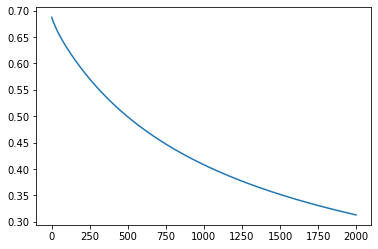

In [7]:
#loss evolution
graph_x = np.arange(0, epochs)
graph_y = lossHistory
plt.plot(graph_x, graph_y)
plt.show()